<a href="https://colab.research.google.com/github/Kenjiro1/Dashboard_vendas/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
url ='https://raw.githubusercontent.com/Kenjiro1/SpotifyGlobal/refs/heads/main/Spotify_2024_Global_Streaming_Data.csv'

In [18]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(url)
df.head()

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [19]:
df.describe()


,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.488000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.671959,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


In [20]:
df=df.loc[:,['Country','Artist','Genre','Monthly Listeners (Millions)','Total Streams (Millions)','Total Hours Streamed (Millions)','Avg Stream Duration (Min)','Platform Type','Streams Last 30 Days (Millions)','Skip Rate (%)']]

df.head()

,Country,Artist,Genre,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,K-pop,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,R&B,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Reggaeton,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,K-pop,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,R&B,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


#Entendendo os dados
o que eu quero prever?


In [21]:
array_paises = df['Country'].unique()
print(array_paises, len(array_paises))

['Germany' 'Brazil' 'United States' 'Italy' 'Sweden' 'France'
 'United Kingdom' 'Argentina' 'South Korea' 'South Africa' 'Australia'
 'Netherlands' 'India' 'Canada' 'Mexico' 'Spain' 'Japan' 'Indonesia'
 'Russia' 'Turkey'] 20


In [22]:
array_df_paises = []
def criar_df_paises(pais):
    df_pais = df[df['Country'] == pais]
    return df_pais

for pais in array_paises:
    array_df_paises.append(criar_df_paises(pais))


#Dentro do array_df_paises temos uma lista com todos os dataframes separados por pais


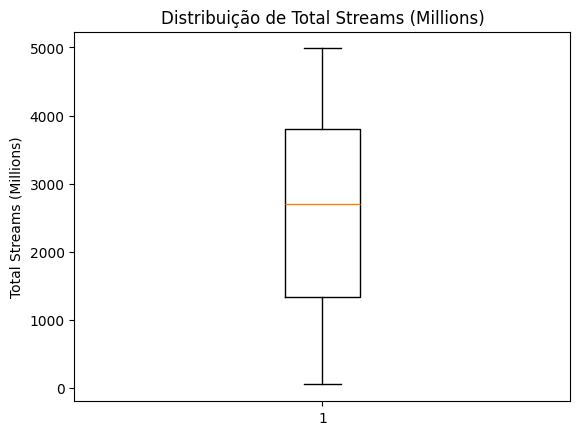

In [23]:
#Vamos compreender quantas "plays" essa musica é considerada um sucesso

df_plays= df['Total Streams (Millions)'].sort_values(ascending=False)
plt.boxplot(df_plays)
plt.title("Distribuição de Total Streams (Millions)")
plt.ylabel("Total Streams (Millions)")
plt.show()

In [24]:
df_plays.describe()

,Total Streams (Millions)
count,500.000000
mean,2581.154080
std,1416.055972
min,53.560000
25%,1337.337500
50%,2697.355000
75%,3798.197500
max,4985.540000


In [25]:
#Vamos considerar um sucesso para todos acima do 3 quartis

valor_teste = df_plays.describe()['75%']

#Vamos adicionar no dataFrame uma coluna que informa se o album foi um sucesso ou não
def avalia_sucesso(valor, valor_teste):
    if valor >= valor_teste:
        return 1
    else:
        return 0

df['Sucesso'] = df['Total Streams (Millions)'].apply(lambda x: avalia_sucesso(x, valor_teste))

#Precisamos atualizar os dataframes da lista de dataframes
array_df_paises = []
for pais in array_paises:
    array_df_paises.append(criar_df_paises(pais))


#Resumo do que foi feito
1- Feito uma lista chama array_df_paises que possui separadamento os DataFrames de cada pais

2- Criada uma coluna sucesso que identifica caso o album tenha atingido uma quantidade de plays maior que 75% da quantidade total (informação vista no boxplot)

#Tratativa dos dados em Artistas e Generos
Como eles podem influenciar nas visualizações?

In [26]:
#Vamos alterar essa função
array_df_paises = []
def criar_df_paises(pais):
    df_pais = df[df['Country'] == pais]
    return df_pais

for pais in array_paises:
    array_df_paises.append(criar_df_paises(pais))

In [27]:
#Teste

In [64]:
import seaborn as sns
paleta_degrade_azul = [
    "#ADD8E6",  # Azul claro
    "#99C2D7",
    "#85B5C8",
    "#70A8B9",
    "#5C9BAA",
    "#4A8E9C",
    "#3D8290",
    "#2F7583",
    "#22677A",
    "#175A6F",
    "#0F4D64",
    "#0A4159",
    "#03354E",
    "#00284B",
    "#00008B"   # Azul escuro
]

def plotar_graficos(df):
    # Agrupar por artista e calcular a média de ouvintes
    df_artistas = df.groupby(df['Artist'])['Monthly Listeners (Millions)'].mean().sort_values(ascending=True)

    # Criar a figura
    plt.figure(figsize=(14, 6))
    barras = plt.barh(df_artistas.index, df_artistas.values, color=paleta_degrade_azul[:len(df_artistas)])

    # Adicionar os valores ao lado de cada barra
    for barra in barras:
        largura = barra.get_width()
        plt.text(largura + 0.1,               # posição X (um pouco à frente da barra)
                 barra.get_y() + barra.get_height() / 2,  # posição Y (meio da barra)
                 f'{largura:.2f} Milhoes',            # valor formatado com 2 casas decimais
                 va='center')                 # alinhamento vertical central



    # Título
    plt.title(f"Média de ouvintes mensais por artista ({df['Country'].iloc[1]}) em milhões")
    # Estética
    sns.despine(bottom=True)
    plt.tight_layout()
    plt.show()


Vamos plotar os dados do df geral sem estarem separados pelos paises

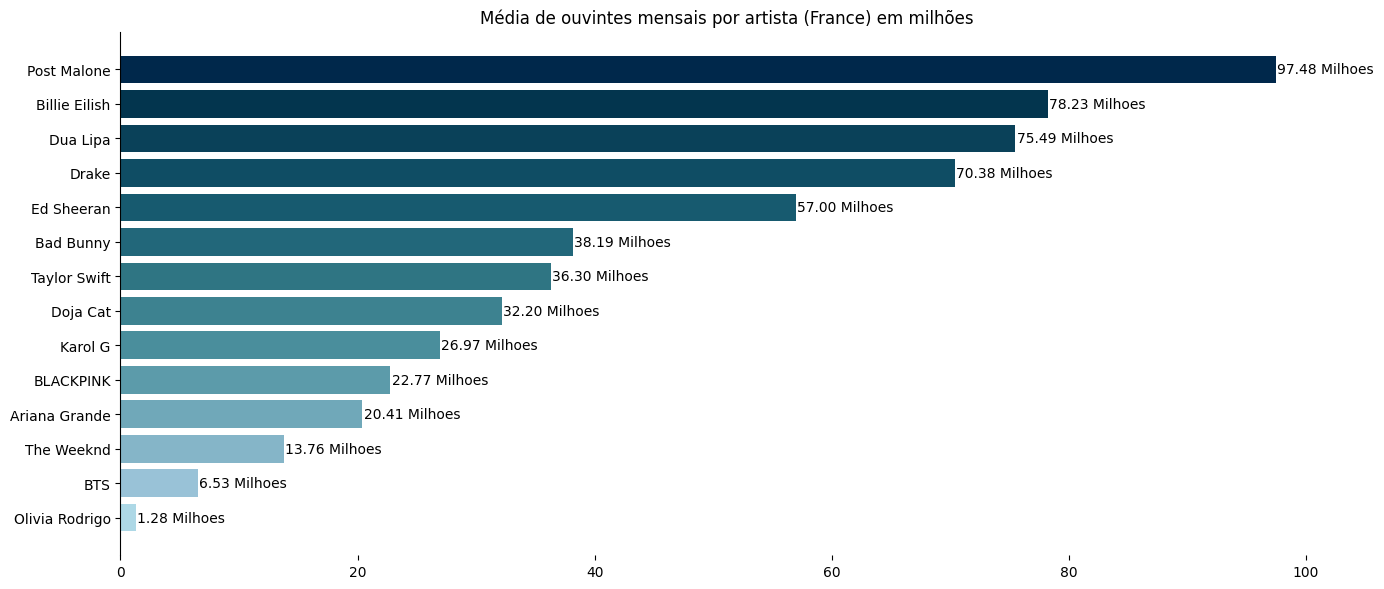

In [65]:
plotar_graficos(array_df_paises[5])

#Criando array para no lugar do numero termos o pais.

In [66]:
paises = df['Country'].unique()
numeros = range(0,len(paises))

paises_numeros = dict(zip(numeros, paises))
paises_numeros

{0: 'Germany',
 1: 'Brazil',
 2: 'United States',
 3: 'Italy',
 4: 'Sweden',
 5: 'France',
 6: 'United Kingdom',
 7: 'Argentina',
 8: 'South Korea',
 9: 'South Africa',
 10: 'Australia',
 11: 'Netherlands',
 12: 'India',
 13: 'Canada',
 14: 'Mexico',
 15: 'Spain',
 16: 'Japan',
 17: 'Indonesia',
 18: 'Russia',
 19: 'Turkey'}

Escolha um número correspondente ao país:
0: Germany
1: Brazil
2: United States
3: Italy
4: Sweden
5: France
6: United Kingdom
7: Argentina
8: South Korea
9: South Africa
10: Australia
11: Netherlands
12: India
13: Canada
14: Mexico
15: Spain
16: Japan
17: Indonesia
18: Russia
19: Turkey
Digite o número do país: 0


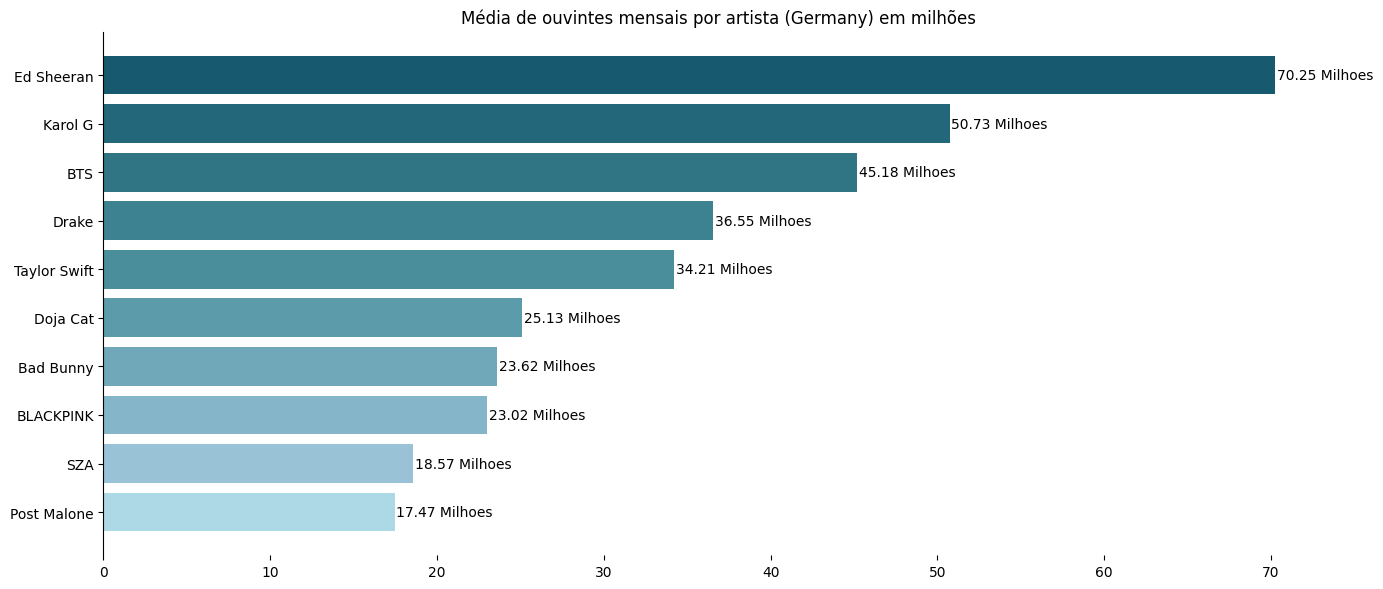

In [67]:
print("Escolha um número correspondente ao país:")
for numero, pais in paises_numeros.items():
    print(f"{numero}: {pais}")

pais = int(input("Digite o número do país: "))
plotar_graficos(array_df_paises[pais])


#Segunda parte é possível fazermos predições?


In [69]:
df.head()
#Recapitulando, esse DataFrame pega como referência o total Streams para informar se esse album será um sucesso ou não



,Country,Artist,Genre,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%),Sucesso
0,Germany,Taylor Swift,K-pop,23.10,3695.53,14240.35,4.28,Free,118.51,2.24,0
1,Brazil,The Weeknd,R&B,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98,0
2,United States,Post Malone,Reggaeton,42.84,1425.46,4177.49,4.03,Free,19.46,4.77,0
3,Italy,Ed Sheeran,K-pop,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12,0
4,Italy,Ed Sheeran,R&B,7.89,3323.25,13446.32,4.47,Free,173.43,15.82,0
